In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train_path = 'datasets/datasets/train'
test_path = 'datasets/datasets/test'
valid_path = 'datasets/datasets/val'

batch_size = 12
img_height = 400
img_width = 400

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_16516\3162882306.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [3]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,  
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


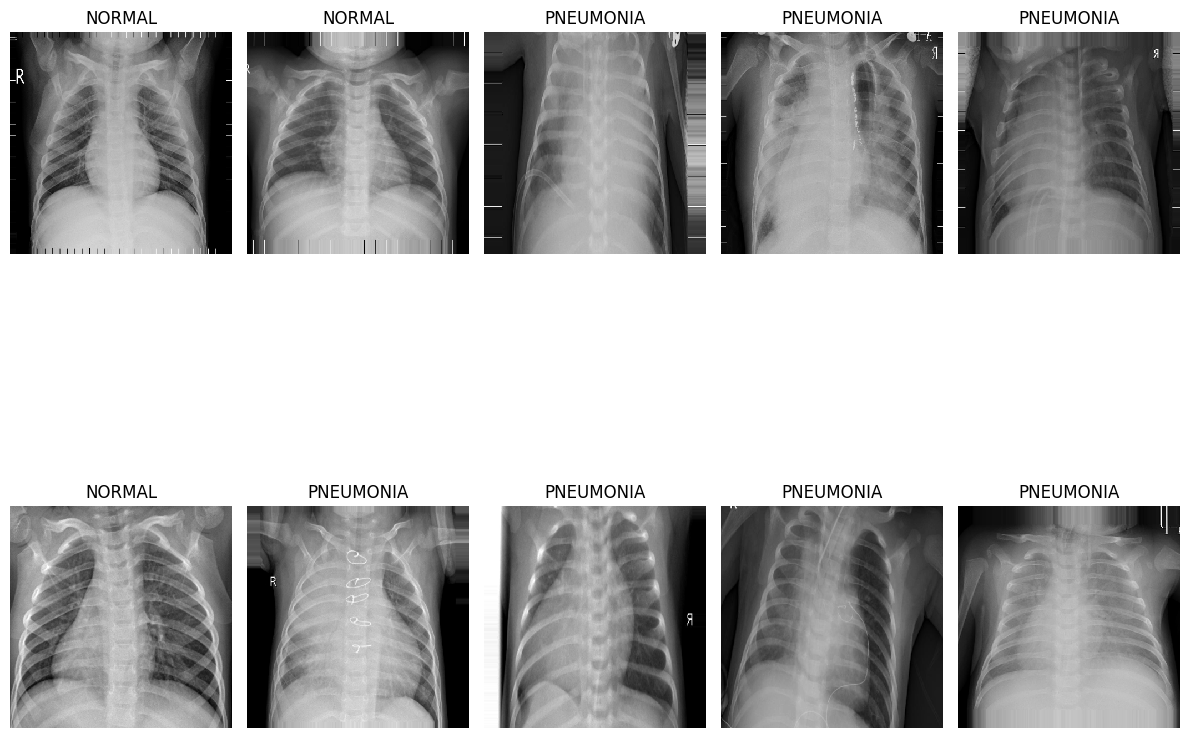

In [4]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        
        plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [6]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 398, 398, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 199, 199, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 197, 197, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,889 (3.44 MB)

 Trainable params: 901,889 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [9]:
cw = {0: 0.8930479925, 1: 0.1069520075}
cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 226s 511ms/step - accuracy: 0.4917 - loss: 0.1368 - val_accuracy: 0.7692 - val_loss: 1.6783 - learning_rate: 0.0010
Epoch 2/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 321s 737ms/step - accuracy: 0.8332 - loss: 0.0711 - val_accuracy: 0.7692 - val_loss: 0.3734 - learning_rate: 0.0010
Epoch 3/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 181s 410ms/step - accuracy: 0.8761 - loss: 0.0566 - val_accuracy: 0.6154 - val_loss: 0.3877 - learning_rate: 0.0010
Epoch 4/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 165s 378ms/step - accuracy: 0.8700 - loss: 0.0603 - val_accuracy: 0.8462 - val_loss: 0.3464 - learning_rate: 0.0010
Epoch 5/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 413s 944ms/step - accuracy: 0.8931 - loss: 0.0480 - val_accuracy: 0.7692 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 6/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 148s 337ms/step - accuracy: 0.8951 - loss: 0.0464 - val_accuracy: 1.0000 - val_loss: 0.1754 - learning_rate: 0.0010
Epoch 7/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 233s 534ms/step - accura

In [10]:
fp = "models/newmod.h5"
cnn.save(fp)

In [11]:
from tensorflow.keras.models import load_model
model = load_model(fp)

<Axes: >

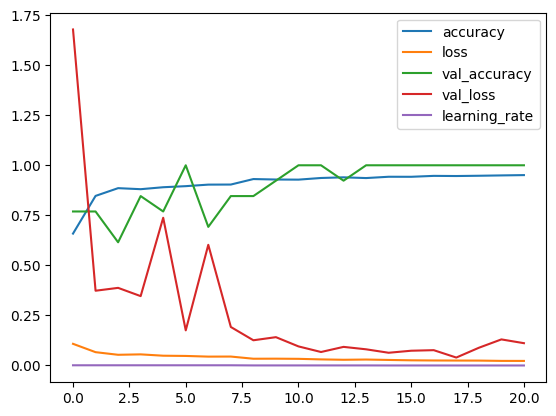

In [12]:
pd.DataFrame(cnn.history.history).plot()

In [13]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.9239 - loss: 0.3042
The testing accuracy is : 93.10897588729858 %


In [14]:
preds = cnn.predict(test,verbose=1)

52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step


In [15]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<Axes: >

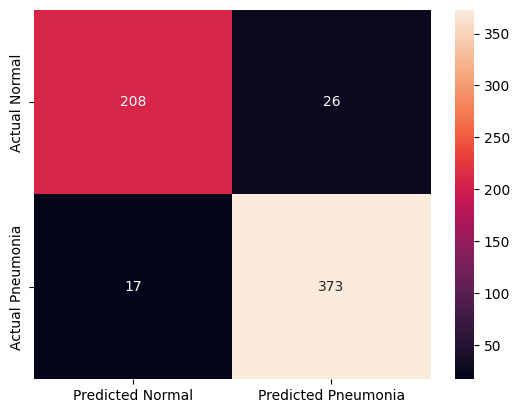

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [17]:
print(classification_report(y_true=test.classes, y_pred=predictions,
                            target_names =['NORMAL','PNEUMONIA']
 ))

              precision    recall  f1-score   support

      NORMAL       0.92      0.89      0.91       234
   PNEUMONIA       0.93      0.96      0.95       390

    accuracy                           0.93       624
   macro avg       0.93      0.92      0.93       624
weighted avg       0.93      0.93      0.93       624



In [18]:
x = []
y = []

for i in range(test.__len__()):
    batch_x, batch_y = test[i]
    x.append(batch_x)
    y.append(batch_y)
x = np.concatenate(x)
y = np.concatenate(y)

print(x.shape)
print(y.shape)


(624, 400, 400, 1)
(624,)


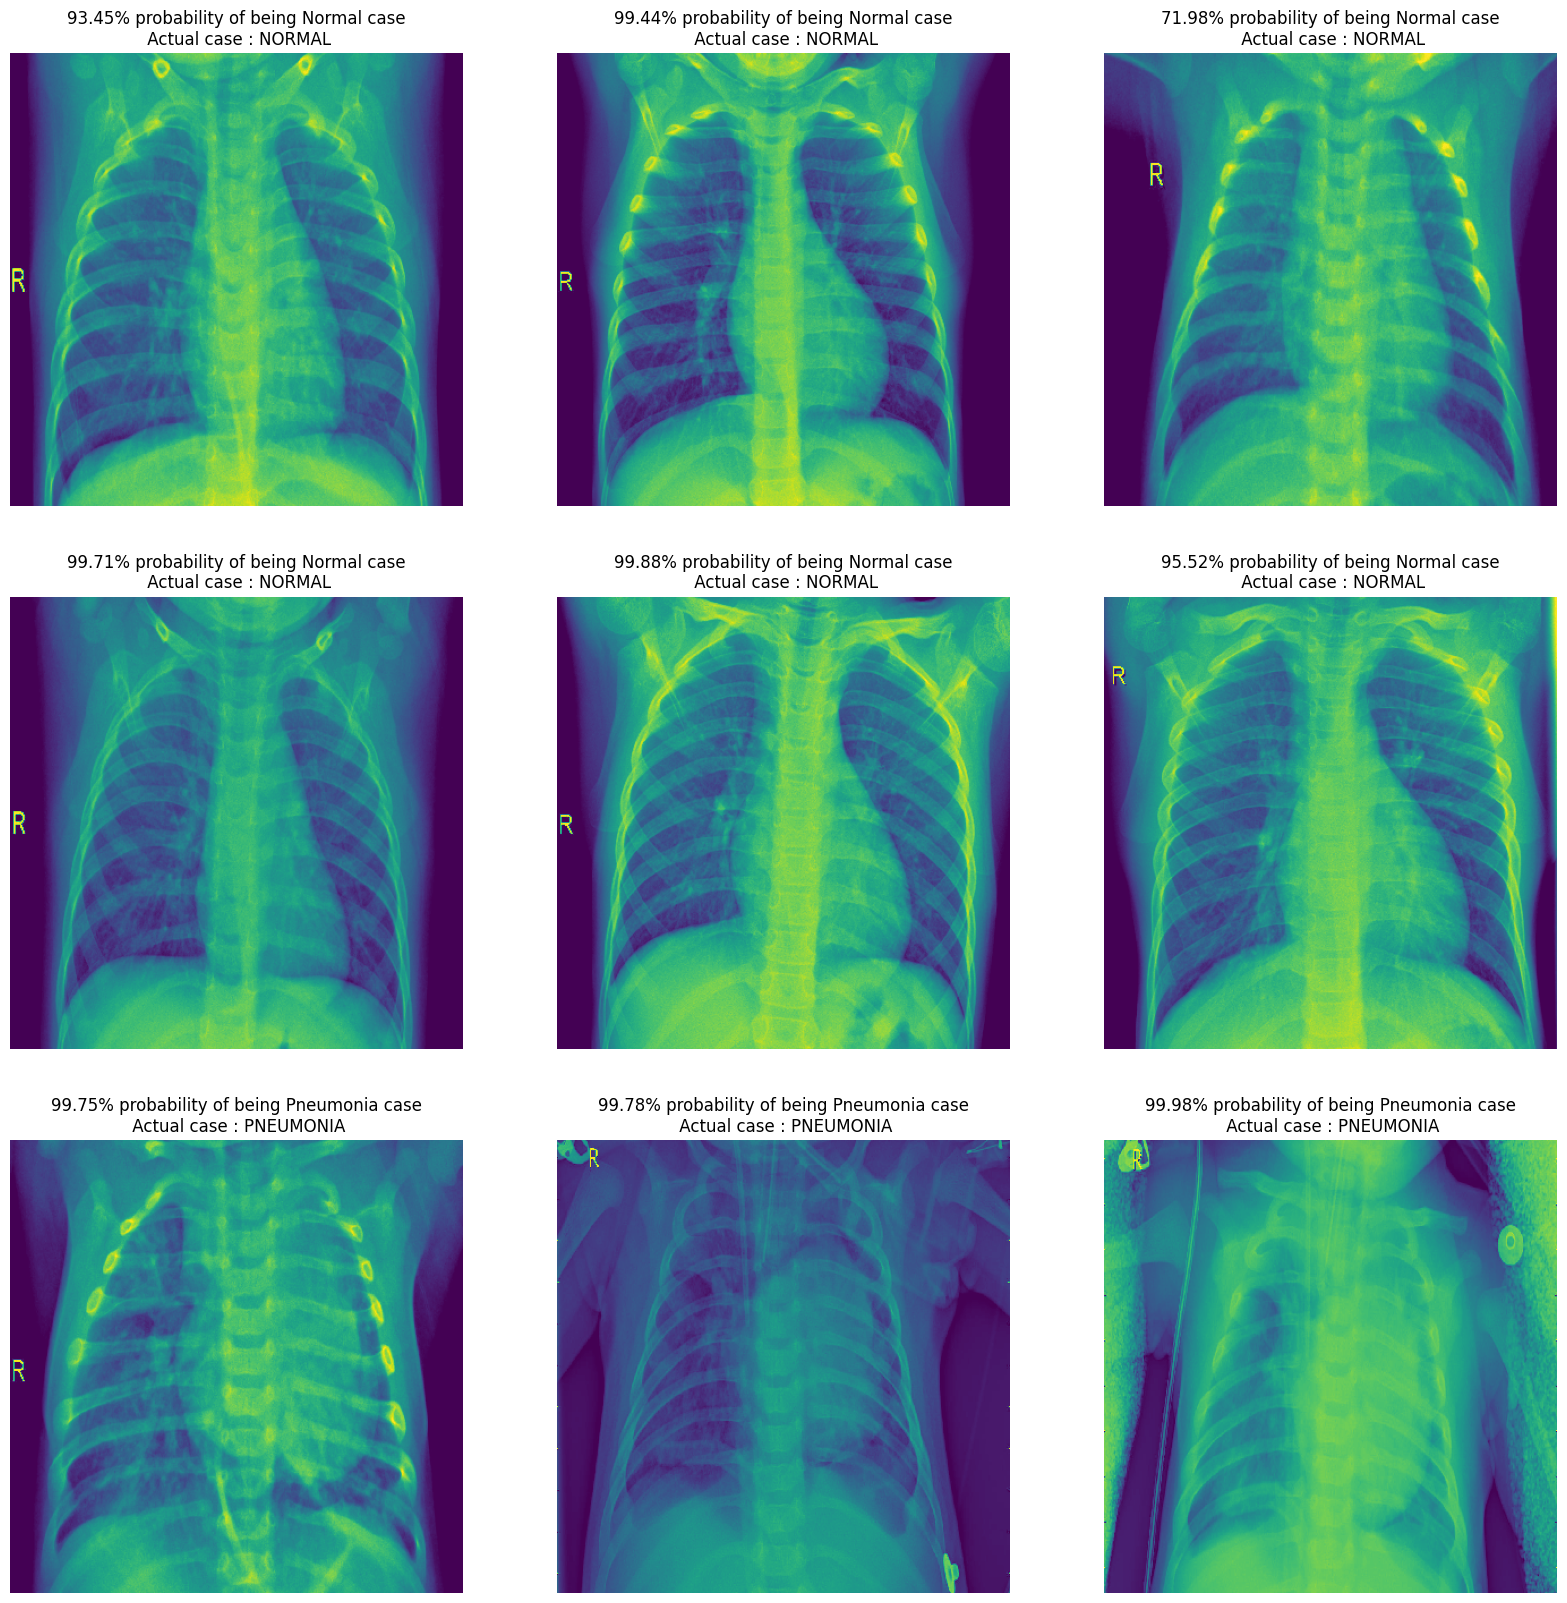

In [19]:
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
      
      

  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


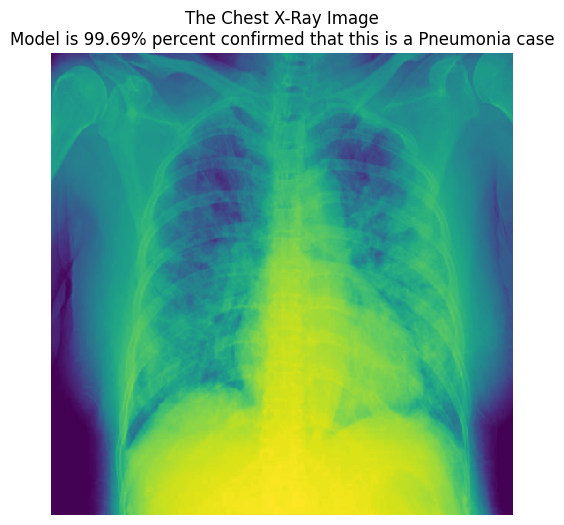

In [21]:
# Testing with random Chest X-Ray available in internet
new_path = 'testimg/test-img-pneumonia.jpg'

from tensorflow.keras.preprocessing import image

new_img = image.load_img(new_path, target_size=(400, 400),color_mode='grayscale')

pp_new_img = image.img_to_array(new_img)
pp_new_img = pp_new_img/255
pp_new_img = np.expand_dims(pp_new_img, axis=0)

new_preds= cnn.predict(pp_new_img)

plt.figure(figsize=(6,6))
plt.axis('off')
if new_preds>= 0.5: 
    out = ('Model is {:.2%} percent confirmed that this is a Pneumonia case'.format(new_preds[0][0]))
    
else: 
    out = ('Model is {:.2%} percent confirmed that this is a Normal case'.format(1-new_preds[0][0]))
    

plt.title("The Chest X-Ray Image\n"+out)  
plt.imshow(np.squeeze(pp_new_img))
plt.show()